In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import ElasticNetCV,LassoCV,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate,train_test_split
from ITMO_FS.filters.univariate import f_ratio_measure,pearson_corr,spearman_corr,kendall_corr
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import RobustScaler,StandardScaler,PowerTransformer
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score,mean_squared_error
from deepforest import CascadeForestRegressor


import seaborn as sns
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
molecular_des_corr_del = pd.read_csv('../第一题/molecular_des_corr_del.csv',index_col=0,)
molecular_des_corr_del.head() 

,nssCH2,nHBint10,SsssCH,nHAvin,SHdsCH,maxsssCH,maxwHBa,maxHBint6,nsssCH,SdO,...,ATSm1,ATSc1,ATSc5,ATSc4,WTPT-3,WTPT-5,nHBAcc_Lipinski,nHBAcc2,ALogp2,CrippenLogP
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,11,0,1.630209,0,0.0,0.789991,2.222816,0.0,3,0.0,...,39.811140,0.460175,-0.080148,0.161524,15.471445,3.406628,4,4,0.081796,5.50408
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,13,0,1.586783,0,0.0,0.769158,2.238441,0.0,3,0.0,...,41.811140,0.460175,-0.080148,0.161524,15.486947,3.406648,4,4,0.743044,6.28428
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,7,2,0.196276,0,0.0,0.273861,2.117122,0.0,2,0.0,...,42.585609,0.519350,-0.059065,0.175159,18.011114,3.406644,5,5,0.532316,6.11878
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,13,0,1.657837,0,0.0,0.850558,2.228687,0.0,3,0.0,...,41.811140,0.460206,-0.079743,0.161226,15.468365,3.406624,4,4,0.101379,6.28428
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,8,0,0.555038,0,0.0,0.497750,2.208996,0.0,2,0.0,...,41.811140,0.462912,-0.069664,0.152869,15.468365,3.406624,4,4,1.836296,5.55658


In [3]:
molecular_des_corr_del_describe = molecular_des_corr_del.describe()

In [4]:
molecular_min = molecular_des_corr_del_describe.loc['min',:]

In [5]:
molecular_max = molecular_des_corr_del_describe.loc['max',:]
molecular_max

nssCH2              39.000000
nHBint10            50.000000
SsssCH               5.134260
nHAvin               2.000000
SHdsCH               3.592883
                      ...    
WTPT-5             125.737688
nHBAcc_Lipinski     66.000000
nHBAcc2             66.000000
ALogp2             533.841025
CrippenLogP         12.070180
Name: max, Length: 137, dtype: float64

In [6]:
admet = pd.read_excel('../data/ADMET.xlsx',sheet_name="training",engine='openpyxl',index_col=0,)
admet.head()

,Caco-2,CYP3A4,hERG,HOB,MN
SMILES,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,1
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0


In [7]:
admet['hERG'] = 1 - admet['hERG']
admet['MN'] = 1 - admet['MN']
admet.head()

,Caco-2,CYP3A4,hERG,HOB,MN
SMILES,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0,1,0,0,1
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0,1,0,0,1
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0,1,0,0,0
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1,0,0,1
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1,0,0,1


In [9]:
good_admet = admet[admet.sum(axis=1) >= 3]
good_admet

,Caco-2,CYP3A4,hERG,HOB,MN
SMILES,,,,,
Oc1ccc(cc1)C2=Cc3cc(O)ccc3C24Cc5ccccc5C4,0,1,1,0,1
Oc1ccc(cc1)C2=Cc3cc(O)ccc3C24C(=O)c5ccccc5C4=O,0,1,1,1,0
Oc1cccc(c1)C2=Cc3cc(O)ccc3C24Cc5ccccc5C4,1,1,1,0,1
CC(C)(C)[C@H]1Sc2cc(O)ccc2O[C@H]1c3ccc(OCCN4CCCCC4)cc3,1,1,0,0,1
CC(C)C[C@H]1Sc2cc(O)ccc2O[C@H]1c3ccc(OCCN4CCCCC4)cc3,1,1,0,0,1
...,...,...,...,...,...
COc1cc(ccc1O)C2Oc3c(OC)cc(\C=C\CO)cc3C2CO,1,1,1,0,0
COC(=O)Cc1ccc(OCc2oc(nc2C)c3cccc(OC)c3)cc1,1,1,0,1,0
COC(=O)c1cccc(OCc2oc(nc2C)c3ccccc3OC)c1,1,1,0,1,0


In [10]:
era_activity = pd.read_excel('../data/ERα_activity.xlsx',engine='openpyxl',index_col=0,)
join_data = good_admet.join(era_activity)
# good_sample_name = join_data[join_data['pIC50'] > 7.5].index.tolist()
sifenweishu = join_data['pIC50'].quantile([0.75]).values[0]
sifenweishu

6.95860731484177

In [11]:
good_sample_name = join_data[join_data['pIC50'] > 8].index.tolist()
len(good_sample_name)

35

In [12]:
chushi_np = molecular_des_corr_del.loc[good_sample_name,:].values
chushi_np.shape

(35, 137)

In [13]:
import numpy as np
from functools import lru_cache
from types import MethodType, FunctionType
import warnings
import sys
def func_transformer(func):
    '''
    transform this kind of function:
    ```
    def demo_func(x):
        x1, x2, x3 = x
        return x1 ** 2 + x2 ** 2 + x3 ** 2
    ```
    into this kind of function:
    ```
    def demo_func(x):
        x1, x2, x3 = x[:,0], x[:,1], x[:,2]
        return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2
    ```
    getting vectorial performance if possible:
    ```
    def demo_func(x):
        x1, x2, x3 = x[:, 0], x[:, 1], x[:, 2]
        return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2
    ```
    :param func:
    :return:
    '''

    # to support the former version
    if (func.__class__ is FunctionType) and (func.__code__.co_argcount > 1):
        warnings.warn('multi-input might be deprecated in the future, use fun(p) instead')

        def func_transformed(X):
            return np.array([func(*tuple(x)) for x in X])

        return func_transformed

    # to support the former version
    if (func.__class__ is MethodType) and (func.__code__.co_argcount > 2):
        warnings.warn('multi-input might be deprecated in the future, use fun(p) instead')

        def func_transformed(X):
            return np.array([func(tuple(x)) for x in X])

        return func_transformed

    # to support the former version
    if getattr(func, 'is_vector', False):
        warnings.warn('''
        func.is_vector will be deprecated in the future, use set_run_mode(func, 'vectorization') instead
        ''')
        set_run_mode(func, 'vectorization')

    mode = getattr(func, 'mode', 'multiprocessing')
    valid_mode = ('common', 'multithreading', 'multiprocessing', 'vectorization', 'cached', 'others')
    assert mode in valid_mode, 'valid mode should be in ' + str(valid_mode)
    if mode == 'vectorization':
        return func
    elif mode == 'cached':
        @lru_cache(maxsize=None)
        def func_cached(x):
            return func(x)

        def func_warped(X):
            return np.array([func_cached(tuple(x)) for x in X])

        return func_warped
    elif mode == 'multithreading':
        from multiprocessing.dummy import Pool as ThreadPool

        pool = ThreadPool()

        def func_transformed(X):
            return np.array(pool.map(func, X))

        return func_transformed
    elif mode == 'multiprocessing':
        from multiprocessing import Pool
        pool = Pool(processes=24)

        def func_transformed(X):
            return np.array(pool.map(func, X))

        return func_transformed

    else:  # common
        def func_transformed(X):
            return np.array([func(x) for x in X])

        return func_transformed

In [14]:
from abc import ABCMeta, abstractmethod
import types
import warnings


class SkoBase(metaclass=ABCMeta):
    def register(self, operator_name, operator, *args, **kwargs):
        '''
        regeister udf to the class
        :param operator_name: string
        :param operator: a function, operator itself
        :param args: arg of operator
        :param kwargs: kwargs of operator
        :return:
        '''

        def operator_wapper(*wrapper_args):
            return operator(*(wrapper_args + args), **kwargs)

        setattr(self, operator_name, types.MethodType(operator_wapper, self))
        return self

    def fit(self, *args, **kwargs):
        warnings.warn('.fit() will be deprecated in the future. use .run() instead.'
                      , DeprecationWarning)
        return self.run(*args, **kwargs)


class Problem(object):
    pass

In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Time    : 2019/8/20
# @Author  : github.com/guofei9987

import numpy as np
# from mypso.tools1 import func_transformer
# from mypso.base1 import SkoBase


class PSO(SkoBase):
    """
    Do PSO (Particle swarm optimization) algorithm.

    This algorithm was adapted from the earlier works of J. Kennedy and
    R.C. Eberhart in Particle Swarm Optimization [IJCNN1995]_.

    The position update can be defined as:

    .. math::

       x_{i}(t+1) = x_{i}(t) + v_{i}(t+1)

    Where the position at the current step :math:`t` is updated using
    the computed velocity at :math:`t+1`. Furthermore, the velocity update
    is defined as:

    .. math::

       v_{ij}(t + 1) = w * v_{ij}(t) + c_{p}r_{1j}(t)[y_{ij}(t) − x_{ij}(t)]
                       + c_{g}r_{2j}(t)[\hat{y}_{j}(t) − x_{ij}(t)]

    Here, :math:`cp` and :math:`cg` are the cognitive and social parameters
    respectively. They control the particle's behavior given two choices: (1) to
    follow its *personal best* or (2) follow the swarm's *global best* position.
    Overall, this dictates if the swarm is explorative or exploitative in nature.
    In addition, a parameter :math:`w` controls the inertia of the swarm's
    movement.

    .. [IJCNN1995] J. Kennedy and R.C. Eberhart, "Particle Swarm Optimization,"
    Proceedings of the IEEE International Joint Conference on Neural
    Networks, 1995, pp. 1942-1948.

    Parameters
    --------------------
    func : function
        The func you want to do optimal
    dim : int
        Number of dimension, which is number of parameters of func.
    pop : int
        Size of population, which is the number of Particles. We use 'pop' to keep accordance with GA
    max_iter : int
        Max of iter iterations
    lb : array_like
        The lower bound of every variables of func
    ub : array_like
        The upper bound of every variables of func
    constraint_eq : tuple
        equal constraint. Note: not available yet.
    constraint_ueq : tuple
        unequal constraint
    Attributes
    ----------------------
    pbest_x : array_like, shape is (pop,dim)
        best location of every particle in history
    pbest_y : array_like, shape is (pop,1)
        best image of every particle in history
    gbest_x : array_like, shape is (1,dim)
        general best location for all particles in history
    gbest_y : float
        general best image  for all particles in history
    gbest_y_hist : list
        gbest_y of every iteration


    Examples
    -----------------------------
    see https://scikit-opt.github.io/scikit-opt/#/en/README?id=_3-psoparticle-swarm-optimization
    """

    def __init__(self,chushi_pop ,func, n_dim=None, pop=40, max_iter=150, lb=-1e5, ub=1e5, w=0.8, c1=0.5, c2=0.5,
                 constraint_eq=tuple(), constraint_ueq=tuple(), verbose=False
                 , dim=None):

        n_dim = n_dim or dim  # support the earlier version

        self.func = func_transformer(func)
        self.w = w  # inertia
        self.cp, self.cg = c1, c2  # parameters to control personal best, global best respectively
        self.pop = pop  # number of particles
        self.n_dim = n_dim  # dimension of particles, which is the number of variables of func
        self.max_iter = max_iter  # max iter
        self.verbose = verbose  # print the result of each iter or not

        self.lb, self.ub = np.array(lb) * np.ones(self.n_dim), np.array(ub) * np.ones(self.n_dim)
        assert self.n_dim == len(self.lb) == len(self.ub), 'dim == len(lb) == len(ub) is not True'
        assert np.all(self.ub > self.lb), 'upper-bound must be greater than lower-bound'

        self.has_constraint = bool(constraint_ueq)
        self.constraint_ueq = constraint_ueq
        self.is_feasible = np.array([True] * pop)

        # self.X = np.random.uniform(low=self.lb, high=self.ub, size=(self.pop, self.n_dim))
        # self.X = chushi_np
        # print(np.random.uniform(low=self.lb, high=self.ub, size=(self.pop - chushi_np.shape[0], self.n_dim)).shape)
        # print(chushi_np.shape)
        self.X = np.vstack((chushi_pop,np.random.uniform(low=self.lb, high=self.ub, size=(self.pop - chushi_np.shape[0], self.n_dim))))

        
        print(self.X.shape[1])
        for i in range(self.X.shape[1]):
            if data_type[:,i]== 1:
                self.X[:,i] = self.X[:,i].astype(np.int64)
        print(self.X.shape)
        v_high = self.ub - self.lb
        self.V = np.random.uniform(low=-v_high, high=v_high, size=(self.pop, self.n_dim))  # speed of particles
        self.Y = self.cal_y()  # y = f(x) for all particles
        self.pbest_x = self.X.copy()  # personal best location of every particle in history
        self.pbest_y = np.array([[np.inf]] * pop)  # best image of every particle in history
        self.gbest_x = self.pbest_x.mean(axis=0).reshape(1, -1)  # global best location for all particles
        self.gbest_y = np.inf  # global best y for all particles
        self.gbest_y_hist = []  # gbest_y of every iteration
        self.update_gbest()

        # record verbose values
        self.record_mode = True
        self.record_value = {'X': [], 'V': [], 'Y': []}
        self.all_best_x = []
        self.all_best_y = []
        self.best_x, self.best_y = self.gbest_x, self.gbest_y  # history reasons, will be deprecated

    def check_constraint(self, x):
        # gather all unequal constraint functions
        # for constraint_func in self.constraint_ueq:
        #     if constraint_func(x) > 0:
        #         return False
        # return True
        
        if self.constraint_ueq(x) > 0:
            return False
        return True

    def update_V(self):
        r1 = np.random.rand(self.pop, self.n_dim)
        r2 = np.random.rand(self.pop, self.n_dim)
        self.V = self.w * self.V + \
                 self.cp * r1 * (self.pbest_x - self.X) + \
                 self.cg * r2 * (self.gbest_x - self.X)
        for i in range(self.V.shape[1]):
            if data_type[:,i]== 1:
                self.V[:,i] = self.V[:,i].astype(np.int64)

    def update_X(self):
        self.X = self.X + self.V
        self.X = np.clip(self.X, self.lb, self.ub)

    def cal_y(self):
        # calculate y for every x in X
        self.Y = self.func(self.X).reshape(-1, 1)
        return self.Y

    def update_pbest(self):
        '''
        personal best
        :return:
        '''
        self.need_update = self.pbest_y > self.Y
        for idx, x in enumerate(self.X):
            if self.need_update[idx]:
                self.need_update[idx] = self.check_constraint(x)

        self.pbest_x = np.where(self.need_update, self.X, self.pbest_x)      
        self.pbest_y = np.where(self.need_update, self.Y, self.pbest_y)

        
    def update_gbest(self):
        '''
        global best
        :return:
        '''
        idx_min = self.pbest_y.argmin()
        if self.gbest_y > self.pbest_y[idx_min]:
            self.gbest_x = self.X[idx_min, :].copy()
            self.all_best_x.append(self.gbest_x)
            self.gbest_y = self.pbest_y[idx_min]

    def recorder(self):
        if not self.record_mode:
            return
        self.record_value['X'].append(self.X)
        self.record_value['V'].append(self.V)
        self.record_value['Y'].append(self.Y)

    def run(self, max_iter=None, precision=1e-7, N=20):
        '''
        precision: None or float
            If precision is None, it will run the number of max_iter steps
            If precision is a float, the loop will stop if continuous N difference between pbest less than precision
        N: int
        '''
        self.max_iter = max_iter or self.max_iter
        c = 0
        for iter_num in range(self.max_iter):
            print("当前迭代次数:\t" + str(iter_num))
            self.update_V()
            self.recorder()
            self.update_X()
            self.cal_y()
            self.update_pbest()
            self.update_gbest()
            if precision is not None:
                tor_iter = np.amax(self.pbest_y) - np.amin(self.pbest_y)
                if tor_iter < precision:
                    c = c + 1
                    if c > N:
                        break
                else:
                    c = 0
            if self.verbose:
                print('Iter: {}, Best fit: {} at {}'.format(iter_num, self.gbest_y, self.gbest_x))

            self.gbest_y_hist.append(self.gbest_y)
        self.best_x, self.best_y = self.gbest_x, self.gbest_y
        return self.best_x, self.best_y

    fit = run

In [16]:
import torch
import torch.nn as nn
import random

import torchvision
from scipy.sparse import csr_matrix
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

torch.manual_seed(999)
np.random.seed(999)
random.seed(999)
class MulitiPrototypicalNet3(nn.Module):
    def __init__(self,in_feature,num_class, embedding_dim,
                 support_ratio = 0.6,query_ratio = 0.3,hidden1_dim = 1024,hidden2_dim = 256,distance='euclidean'):
        super(MulitiPrototypicalNet3, self).__init__()
        self.num_class = num_class
        self.embedding_dim = embedding_dim
        self.support_ratio = support_ratio
        self.query_ratio = query_ratio
        self.support_num = []
        self.query_num = []
        self.distance = distance
        self.prototype = None
        self.prototypes = []

        self.feature_extraction = nn.Sequential(
            nn.Linear(in_features=in_feature, out_features=hidden1_dim),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=hidden1_dim, out_features=hidden2_dim),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=hidden2_dim, out_features=embedding_dim),
        )


    def weights_init_(self):
        for m in self.modules():
            torch.nn.init.xavier_normal_(m.weight, gain=1, )
            torch.nn.init.constant_(m.bias, 0)

    def embedding(self, features):

        result = self.feature_extraction(features)
        return result

    def forward(self, support_input, query_input):

        support_embedding = self.embedding(support_input)
        query_embedding = self.embedding(query_input)
        support_size = support_embedding.shape[0]


        class_meta_dict = {}

        index_tmp = np.cumsum(self.support_num)


        for i in range(0, self.num_class):
            # i  0 , 1, 2, 3,
            start_index = 0 if i == 0 else index_tmp[i-1]
            end_index = index_tmp[i]
            # class_meta_dict[i] = torch.sum(support_embedding[i * every_class_num:(i + 1) * every_class_num, :],
            #                                dim=0) / self.support_num[i]

            # print((start_index,end_index))

            class_meta_dict[i] = torch.sum(support_embedding[start_index:end_index, :],
                                           dim=0) / self.support_num[i]

        class_meta_information = torch.zeros(size=[len(class_meta_dict), support_embedding.shape[1]])
        for key, item in class_meta_dict.items():
            class_meta_information[key, :] = class_meta_dict[key]

        N_query = query_embedding.shape[0]
        result = torch.zeros(size=[N_query, self.num_class])

        self.prototype = class_meta_information
        self.prototypes.append(class_meta_information.detach().numpy())

        for i in range(0, N_query):
            temp_value = query_embedding[i].repeat(self.num_class, 1)
            dist_value = F.pairwise_distance(self.prototype, temp_value, p=2)
            result[i] = -1 * dist_value
        return result

    def randomGenerate(self, X, Y):

        support_index = []
        for i in range(self.num_class):

            support_index.extend(np.random.choice(np.where(Y == i)[0], self.support_num[i],
                                                  replace=False))

        support_index = np.array(support_index)
        support_input = X[support_index, :]
        support_label = Y[support_index]

        query_index = []
        for i in range(self.num_class):
            query_index.extend(np.random.choice([index for index in np.where(Y == i)[0] if
                                                 index not in support_index],
                                                self.query_num[i], replace=False))
        query_index = np.array(query_index)
        query_input = X[query_index]
        query_label = Y[query_index]

        support_input = torch.tensor(support_input, dtype=torch.float)
        query_input = torch.tensor(query_input, dtype=torch.float)
        support_label = torch.tensor(support_label, dtype=torch.long)
        query_label = torch.tensor(query_label, dtype=torch.long)

        return support_input, query_input, support_label, query_label

    
    def fit(self,X_train,y_train,X_valid,y_valid,optimizer,criterion,patience,EPOCH):

        for i in range(self.num_class):
            cur_y_count = sum(y_train == i)
            self.support_num.append(int(cur_y_count * self.support_ratio ))
            self.query_num.append(int(cur_y_count * self.query_ratio))

        # patience = patience  # 当验证集损失在连续20次训练周期中都没有得到降低时，停止模型训练，以防止模型过拟合
        early_stopping = EarlyStopping(patience, verbose=True, path="finish_model_1.pkl")        
        
        loss_list = []
        
        for epoch in range(EPOCH):
            self.train()
            support_input, query_input, support_label, query_label = \
                self.randomGenerate(X_train,y_train)

            output = self.forward(support_input, query_input)
            loss = criterion(output, query_label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())
        
        
            pre_valid_y, prob_valid_y = self.predict(X_valid)
            auc = roc_auc_score(y_valid, prob_valid_y)
            
            
            # print("Epoch: {:04d}".format(epoch), "acc:{:.4f}".format(1 - error)      
            
            early_stopping(1-auc, model)
            if early_stopping.early_stop:
                print("Early stopping")
                break
            
            print("Epoch number:{},Current loss:{:.4f},Current accuracy:{:.4f}\n".format(epoch, loss.item(),auc))
        
        return loss_list
    

    def predict(self,X_test):

        self.eval()
        X_test = torch.tensor(X_test, dtype=torch.float32)
        X_embedding = self.embedding(X_test)
        result = torch.zeros(size=[X_embedding.shape[0], self.num_class])
        for i in range(0, X_embedding.shape[0]):

            temp_value = X_embedding[i].repeat(self.num_class, 1)
            dist_value = 0
            if self.distance == 'euclidean':
                dist_value = F.pairwise_distance(self.prototype, temp_value, p=2)
            elif self.distance == 'cosine':
                dist_value = torch.cosine_similarity(self.prototype, temp_value, dim=1)
                dist_value = 1 - dist_value
                  
            result[i] = -1 * dist_value
                  
        result = F.softmax(result, dim=1)

        pre_Y = torch.argmax(result, dim=1).detach().numpy().astype(int)
        prob_Y = result[:,1].detach().numpy()
        return pre_Y, prob_Y


In [17]:
import pickle
import joblib
import torch
pkl_filename = "../第二问/deepforest_137_model.pkl"
with open(pkl_filename, 'rb') as file:
    load_deepforest = pickle.load(file)
# load_deepforest = pickle.load("yys/2021华为杯D题/问题4/deepforest_model.pkl")
# y_pred = load_deepforest.predict()
p2_ss = joblib.load("../第三问/p2_ss.pkl")
pn_model1 = torch.load("../第三问/finish_model_1.pkl")
pn_model2 = torch.load("../第三问/finish_model_2.pkl")
pn_model3 = torch.load("../第三问/finish_model_3.pkl")
pn_model4 = torch.load("../第三问/finish_model_4.pkl")
pn_model5 = torch.load("../第三问/finish_model_5.pkl")
# X_valid = p2_ss.transform(X_valid)
# pn_model1.predict(X_valid)[0]

In [18]:
molecular_des_corr_del.info()
data_type = np.zeros((1,molecular_des_corr_del.shape[1]))
for i in range(0,molecular_des_corr_del.shape[1]):
    if molecular_des_corr_del.iloc[:,i].dtype == 'int64':
        data_type[:,i]=1
data_type   

<class 'pandas.core.frame.DataFrame'>
Index: 1974 entries, Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4 to COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@H]3C[C@H]4O[C@@H]3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)cc2)c1
Columns: 137 entries, nssCH2 to CrippenLogP
dtypes: float64(105), int64(32)
memory usage: 2.2+ MB


array([[1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0.]])

In [19]:
def demo_func(x):
    # x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 = x
    # x[i] for i in range(0,134) = x
    # for i in range(1,135):
    #     exec('x{} = {}'.format(i,x))
    # print(feature_20_index)
    # print(x[[1,2]])
    x = x.reshape(-1,1)
    x1 = x.reshape(1,-1)
    x = x.reshape(1,-1)
    x = p2_ss.transform(x)
    return -100*(0.7*0.1*load_deepforest.predict(x1)
                    +0.3*0.2*( pn_model1.predict(x)[0]
                    +pn_model2.predict(x)[0]
                    +(1-pn_model3.predict(x)[0])
                    +pn_model4.predict(x)[0]
                    +(1-pn_model5.predict(x)[0])))

In [20]:
constraint_ueq = (
    
    lambda x:  3 - (pn_model1.predict(p2_ss.transform(x.reshape(1,-1)))[0]
                    +pn_model2.predict(p2_ss.transform(x.reshape(1,-1)))[0]
                    +(1-pn_model3.predict(p2_ss.transform(x.reshape(1,-1)))[0])
                    +pn_model4.predict(p2_ss.transform(x.reshape(1,-1)))[0]
                    +(1-pn_model5.predict(p2_ss.transform(x.reshape(1,-1)))[0]))
                       
)

In [21]:
pso = PSO(chushi_pop=chushi_np,func=demo_func,constraint_ueq=constraint_ueq,n_dim=137, pop=70, max_iter=100, lb=molecular_min.values, ub=molecular_max.values, w=0.8, c1=1.2, c2=1.2)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

137
(70, 137)
当前迭代次数:	0
当前迭代次数:	1
当前迭代次数:	2
当前迭代次数:	3
当前迭代次数:	4
当前迭代次数:	5
当前迭代次数:	6
当前迭代次数:	7
当前迭代次数:	8
当前迭代次数:	9
当前迭代次数:	10
当前迭代次数:	11
当前迭代次数:	12
当前迭代次数:	13
当前迭代次数:	14
当前迭代次数:	15
当前迭代次数:	16
当前迭代次数:	17
当前迭代次数:	18
当前迭代次数:	19
当前迭代次数:	20
当前迭代次数:	21
当前迭代次数:	22
当前迭代次数:	23
当前迭代次数:	24
当前迭代次数:	25
当前迭代次数:	26
当前迭代次数:	27
当前迭代次数:	28
当前迭代次数:	29
当前迭代次数:	30
当前迭代次数:	31
当前迭代次数:	32
当前迭代次数:	33
当前迭代次数:	34
当前迭代次数:	35
当前迭代次数:	36
当前迭代次数:	37
当前迭代次数:	38
当前迭代次数:	39
当前迭代次数:	40
当前迭代次数:	41
当前迭代次数:	42
当前迭代次数:	43
当前迭代次数:	44
当前迭代次数:	45
当前迭代次数:	46
当前迭代次数:	47
当前迭代次数:	48
当前迭代次数:	49
当前迭代次数:	50
当前迭代次数:	51
当前迭代次数:	52
当前迭代次数:	53
当前迭代次数:	54
当前迭代次数:	55
当前迭代次数:	56
当前迭代次数:	57
当前迭代次数:	58
当前迭代次数:	59
当前迭代次数:	60
当前迭代次数:	61
当前迭代次数:	62
当前迭代次数:	63
当前迭代次数:	64
当前迭代次数:	65
当前迭代次数:	66
当前迭代次数:	67
当前迭代次数:	68
当前迭代次数:	69
当前迭代次数:	70
当前迭代次数:	71
当前迭代次数:	72
当前迭代次数:	73
当前迭代次数:	74
当前迭代次数:	75
当前迭代次数:	76
当前迭代次数:	77
当前迭代次数:	78
当前迭代次数:	79
当前迭代次数:	80
当前迭代次数:	81
当前迭代次数:	82
当前迭代次数:	83
当前迭代次数:	84
当前迭代次数:	85
当前迭代次数:	86
当前迭代次数:	87
当前迭代次数:	88
当前迭代次数:	89
当前迭代次数

best_x is  [ 1.90000000e+01  7.00000000e+00  5.13425951e+00  0.00000000e+00
  0.00000000e+00  9.77518833e-01  6.07662360e+00  0.00000000e+00
  2.00000000e+01  0.00000000e+00  0.00000000e+00  4.60000000e+01
  0.00000000e+00  1.08949481e+02 -6.56560374e-01  5.38280128e-02
 -1.19013727e+00  0.00000000e+00  2.02578085e+00  5.52851238e-01
 -4.22412998e+00  1.54779912e+01  0.00000000e+00  0.00000000e+00
  6.72713738e+00  1.00000000e+00 -2.45409786e+00 -7.17293526e-01
 -2.17616536e+01  0.00000000e+00  9.92777778e-01  2.89674171e-01
  9.57880394e+00  0.00000000e+00  1.10843780e+00 -1.19807343e+00
  1.46774927e+02  0.00000000e+00  6.92062053e-02 -7.15245929e-01
  3.20119402e-01  9.64655402e-01  2.03282668e+00 -5.88781415e-01
  2.22970589e+00 -1.65173138e+00 -3.74737125e-02  1.76326200e+00
  1.00821151e+01  4.99667495e+01  2.68483123e+00  0.00000000e+00
  0.00000000e+00 -6.54382612e+00  1.24708500e+01  0.00000000e+00
  8.12262492e-01  1.37812217e+00  5.00000000e+00  1.17265723e+01
  0.00000000e+

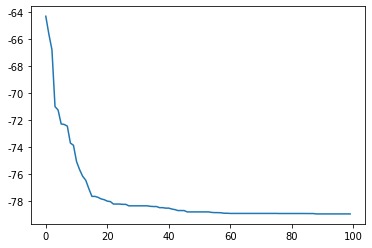

In [22]:
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)
ans = load_deepforest.predict(pso.gbest_x.reshape(1,-1))
print(ans)
plt.plot(pso.gbest_y_hist)
plt.show()

In [23]:
print(pn_model1.predict(p2_ss.transform(pso.gbest_x.reshape(1,-1)))[0])
print(pn_model2.predict(p2_ss.transform(pso.gbest_x.reshape(1,-1)))[0])
print(pn_model3.predict(p2_ss.transform(pso.gbest_x.reshape(1,-1)))[0])
print(pn_model4.predict(p2_ss.transform(pso.gbest_x.reshape(1,-1)))[0])
print(pn_model5.predict(p2_ss.transform(pso.gbest_x.reshape(1,-1)))[0])

[0]
[1]
[0]
[1]
[0]


In [23]:
best_x_df = pd.DataFrame(columns=molecular_des_corr_del.columns,index = range(len(pso.all_best_x)))
start_index = 0
for  i in pso.all_best_x:
    best_x_df.iloc[start_index,:] = i
    start_index = start_index + 1
# best_x_df.loc[:,best_x_df.std() > 10]
# best_x_df['HX'] = 
best_x_df

,nssCH2,nHBint10,SsssCH,nHAvin,SHdsCH,maxsssCH,maxwHBa,maxHBint6,nsssCH,SdO,...,ATSm1,ATSc1,ATSc5,ATSc4,WTPT-3,WTPT-5,nHBAcc_Lipinski,nHBAcc2,ALogp2,CrippenLogP
0,0,1,-1.82837,0,0,0.661924,0,5.22766,4,0,...,15.7745,0.0349183,-2.88997,1.23553,114.412,0,28,4,3.6e-07,2.67101
1,0,9,5.13426,1,0,0.977519,0,8.51748,3,97.7459,...,37.7184,0.991925,-2.26881,0.471817,121.375,0,10,36,3.6e-07,11.7087
2,18,8,-0.0626745,0,0,0.798011,0.241712,6.73359,20,8.1482,...,15.7745,0.366234,-2.68681,1.50779,118.745,14.5878,30,27,70.0812,12.0702
3,17,0,5.13426,0,0,0.40289,0,0.642633,19,0,...,32.2965,0.910486,-0.0164674,1.54733,30.3111,15.2179,28,38,25.3289,11.5371
4,26,0,5.13426,0,0,0.246078,1.97252,0,10,0,...,15.7745,0.0349183,-1.95294,1.3892,2.47447,20.4078,9,14,3.6e-07,11.2943
5,13,2,5.13426,1,0,0,1.65146,0,9,0,...,15.7745,0.10097,0.60446,1.82686,2.47447,3.41904,1,4,8.71729,12.0702
6,14,1,5.13426,1,0,0,3.09782,0,11,0,...,15.7745,0.0349183,-1.12001,1.75374,2.47447,13.0446,3,12,3.6e-07,12.0702
7,0,8,5.13426,1,0,0,4.01627,0,0,0,...,21.2998,0.0349183,0.00144011,1.49621,37.4759,8.67882,1,0,3.6e-07,12.0702
8,13,3,5.13426,0,0,0,2.97819,0,0,0,...,15.7745,0.045169,0.60446,1.78787,2.47447,1.68928,1,0,3.6e-07,12.0702
9,9,5,5.13426,0,0,0,3.94763,0,0,0,...,15.7745,0.0349183,0.60446,1.75667,2.47447,3.0407,1,0,3.6e-07,12.0702


In [25]:
best_x_HX = []
best_x_Caco_2 = []
best_x_CYP3A4 = []
best_x_hERG = []
best_x_HOB = []
best_x_MN = []
for  best_x in pso.all_best_x:
    best_x_HX.append(load_deepforest.predict(best_x.reshape(1,-1))[0][0])
    best_x_Caco_2.append(pn_model1.predict(p2_ss.transform(best_x.reshape(1,-1)))[0][0])
    best_x_CYP3A4.append(pn_model2.predict(p2_ss.transform(best_x.reshape(1,-1)))[0][0])
    best_x_hERG.append(pn_model3.predict(p2_ss.transform(best_x.reshape(1,-1)))[0][0])
    best_x_HOB.append(pn_model4.predict(p2_ss.transform(best_x.reshape(1,-1)))[0][0])
    best_x_MN.append(pn_model5.predict(p2_ss.transform(best_x.reshape(1,-1)))[0][0])
    
    
best_x_HX
best_x_df['pIC50'] = best_x_HX
best_x_df['Caco-2'] = best_x_Caco_2
best_x_df['CYP3A4'] = best_x_CYP3A4
best_x_df['hERG'] = best_x_hERG
best_x_df['HOB'] = best_x_HOB
best_x_df['MN'] = best_x_MN
best_x_df

,nssCH2,nHBint10,SsssCH,nHAvin,SHdsCH,maxsssCH,maxwHBa,maxHBint6,nsssCH,SdO,...,nHBAcc_Lipinski,nHBAcc2,ALogp2,CrippenLogP,pIC50,Caco-2,CYP3A4,hERG,HOB,MN
0,0,1,-1.82837,0,0,0.661924,0,5.22766,4,0,...,28,4,3.6e-07,2.67101,6.611418,0,1,0,1,1
1,0,9,5.13426,1,0,0.977519,0,8.51748,3,97.7459,...,10,36,3.6e-07,11.7087,6.801254,0,1,0,1,1
2,18,8,-0.0626745,0,0,0.798011,0.241712,6.73359,20,8.1482,...,30,27,70.0812,12.0702,6.967000,0,1,0,1,1
3,17,0,5.13426,0,0,0.40289,0,0.642633,19,0,...,28,38,25.3289,11.5371,7.060960,0,1,0,1,1
4,26,0,5.13426,0,0,0.246078,1.97252,0,10,0,...,9,14,3.6e-07,11.2943,6.871402,0,1,0,1,0
5,13,2,5.13426,1,0,0,1.65146,0,9,0,...,1,4,8.71729,12.0702,7.161990,0,1,0,1,0
6,14,1,5.13426,1,0,0,3.09782,0,11,0,...,3,12,3.6e-07,12.0702,7.193986,0,1,0,1,0
7,0,8,5.13426,1,0,0,4.01627,0,0,0,...,1,0,3.6e-07,12.0702,7.278378,0,1,0,1,0
8,13,3,5.13426,0,0,0,2.97819,0,0,0,...,1,0,3.6e-07,12.0702,7.380590,0,1,0,1,0
9,9,5,5.13426,0,0,0,3.94763,0,0,0,...,1,0,3.6e-07,12.0702,7.381414,0,1,0,1,0


In [26]:
# best_x_df.to_csv("迭代最优个体_137.csv",header=True,index=True)

In [77]:
best_x_df.iloc[:,feature_20_index]

,MDEC-23,LipoaffinityIndex,maxssO,MLFER_A,maxHsOH,minHsOH,minsOH,BCUTc-1h,maxsOH,MDEO-12,minHBint5,BCUTp-1h,SHsOH,minHBint10,ATSc4,ndssC,minHBa,C3SP2,MDEC-22,WTPT-5
0,4.87401,23.0037,0,7.18529,0.805699,-0.123252,11.0344,0.52763,4.37771,1.20981,0.957806,13.3254,0,-1.4877,1.19555,1,-2.4541,12,35.3207,0
1,4.68848,14.1274,3.52737,5.6844,0.115165,0.540536,11.7323,0.336484,3.79172,0,3.31996,8.93031,0,2.9034,1.54176,16,0.903125,12,35.3207,37.0743
2,11.0023,16.0858,5.11739,5.93899,0.539952,0.641784,11.7323,0.376575,5.26763,0,-0.423224,11.0273,0,0.740449,1.82686,0,-1.3371,5,28.4376,0
3,14.9984,23.0037,6.72714,7.754,0.611901,0.4254,11.7323,0.52763,9.92129,0.525879,-1.19807,11.9927,0,-1.4877,1.82686,1,-2.4541,12,27.7191,0
4,13.8622,23.0037,6.72714,4.88709,0.416516,0.414495,11.7323,0.52763,5.76292,0,0.575795,11.6004,0,-1.23193,1.82686,11,-2.4541,7,35.3207,1.05258
5,28.7244,22.4397,6.72714,6.80472,0.640011,0.661681,9.22046,0.358331,12.4709,0,3.15473,13.6901,0,-1.4877,-0.0907033,3,-2.4541,9,28.864,7.44697
6,54.0202,23.0037,6.72714,4.08575,0.391499,0.726477,10.1056,0.277203,12.4709,0.289866,2.22045,16.7483,1.28004,-1.4877,1.82686,1,-1.80686,7,24.8249,0
7,54.0202,23.0037,6.72714,7.754,0.508679,0.697565,9.74741,0.250391,12.4709,0.27553,4.75304,16.7483,1.2814,-1.4877,1.82686,1,-2.08112,7,20.9493,0
8,54.0202,23.0037,6.72714,4.27138,0.466849,0.762617,11.0762,0.0786892,12.4709,0.105489,3.67802,16.7483,1.15405,-1.4877,1.22903,0,-2.4541,6,19.4994,0
9,54.0202,23.0037,6.72714,5.37091,0.528299,0.762493,9.7298,0.072126,12.4709,0.0961916,4.24195,16.7483,1.33275,-1.4877,1.59341,0,-2.4541,6,18.3012,0
